#Iris Species Classification

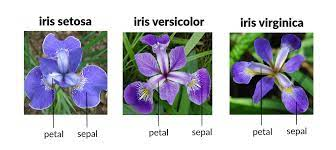


Introduction
The dataset for this project originates from the UCI Machine Learning Repository. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).
Four features were measured from each sample (in centimetres):
Length of the sepals
Width of the sepals
Length of the petals
Width of the petals

# Step 1: Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Step 2: Load Dataset

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
df['target'] = pd.Series(iris_dataset.target)

# Step 3:Data Description

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

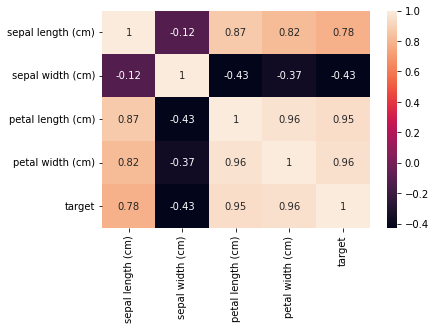

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True);

In [ ]:
#divide our data into predictors (X) and target values (y)
X = df.copy()
y = X.pop('target')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
df.target.value_counts(normalize= True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

#Logistic Regression Classifier

#Fit model

In [ ]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

#Accuracy metrics

In [ ]:
#the score, or accuracy of the model
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

actual  predicted
0        2          2
1        0          0
2        1          1
3        0          0
4        0          0
5        0          0
6        2          2
7        2          2
8        2          2
9        1          1
10       0          0
11       1          1
12       2          2
13       1          1
14       2          2
15       0          0
16       2          2
17       1          1
18       1          1
19       2          2
20       1          1
21       1          1
22       0          0
23       0          0
24       2          2
25       2          1
26       0          0
27       0          0
28       1          1
29       1          1

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0])

2   1   0
2  9   1   0
1  0  10   0
0  0   0  10

#K-Nearest Neigbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

#Model Fitting

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(X)

#Accuracy Fitting

In [ ]:
score=(metrics.accuracy_score(y, y_pred))
print(score)

0.96


#Hyperparameter tuning

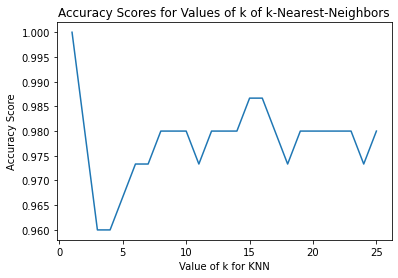

In [ ]:

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
